# CC3001 Otoño 2021 Tarea 5 Tomás Rivas
# Inserción en la raíz en un ABB
## Profesores
Patricio Poblete, Nelson Baloian, Ivan Sipiran

---

# CONTEXTO

El algoritmo usual de inserción en un ABB realiza una búsqueda infructuosa para la nueva llave, y la coloca en el lugar de la hoja en donde termina la búsqueda. Se dice que es una *inserción en las hojas*.

Por contraposición, un algoritmo de *inserción en la raíz* deja la nueva llave como raíz del árbol resultante. En el apunte aparece un algoritmo de este tipo basado en *rotaciones*.

El objetivo de esta tarea es implementar inserción en la raíz de un ABB usando un algoritmo alternativo, basado en la operación ``cut``(corte).

Para comenzar, recordemos esta implementación del algoritmo de inserción usual (inserción en las hojas) adaptada del apunte:

In [ ]:
!pip install aed-utilities
import aed_utilities as aed

  Created wheel for aed-utilities: filename=aed_utilities-0.5.2-cp37-none-any.whl size=4467 sha256=597a66d5ec982becd7f38999f1676c9a3fcb0781ec3c0c2a1b97cdd16b85151d
  Stored in directory: /root/.cache/pip/wheels/68/e6/33/33cadc26cc3b96e6f5830bb498d2c521b2e0fca7069fd52473
Successfully built aed-utilities


In [ ]:
class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
        
    def insert(self,x):
        assert x!=self.info
        if x<self.info:
            return Nodoi(self.izq.insert(x),self.info,self.der)
        else:
            return Nodoi(self.izq,self.info,self.der.insert(x))

class Nodoe:
    def __init__(self):
        pass
    
    def insert(self,x):
        return Nodoi(Nodoe(),x,Nodoe())

class Arbol:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz     
        
    def insert(self,x):
        self.raiz=self.raiz.insert(x)
    
    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", classNone=Nodoe, drawNull=True)
      btd.draw_tree(self, "raiz")

Probemos este algoritmo con una secuencia de inserciones:

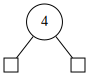

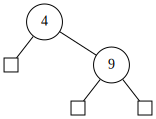

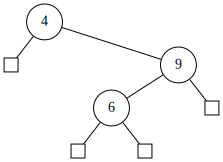

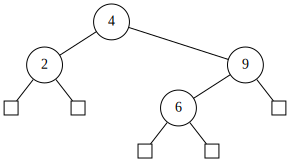

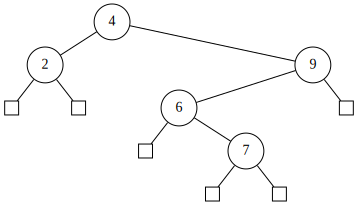

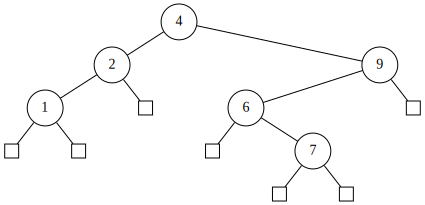

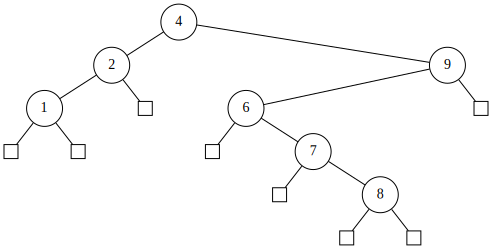

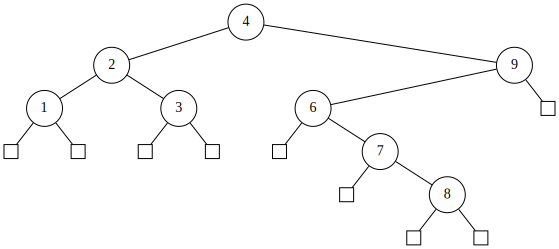

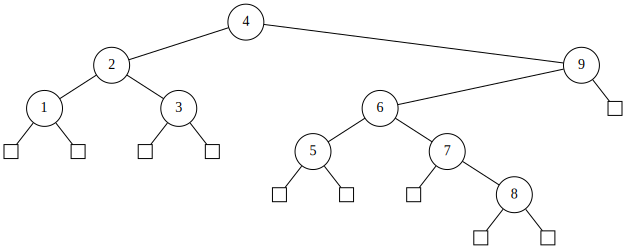

In [ ]:
lista=[4,9,6,2,7,1,8,3,5]
a=Arbol()
for x in lista:
    a.insert(x)
    a.dibujar()

Para definir el algoritmo de inserción en la raíz, definimos primero la operación ``cut(x)``. La idea es la siguiente: dado un árbol $A$ y una llave $x$ que no está en el árbol, el resultado de ejecutar $\text{cut}(x)$ sobre el árbol $A$ es una tupla $(A_{<x},A_{>x})$, que contiene como primera componente el árbol que contiene solo las llaves que son menores que $x$, y similarmente la segunda componente es el árbol con las llaves mayores que $x$. Por ejemplo:

![T5-cut](https://github.com/ppoblete/CC3001-2020-2-Tareas/blob/master/T5-cut.png?raw=1)

La operación ``cut(x)`` se puede definir recursivamente:

Para el caso de un árbol no vacío con raíz $r$, con $x<r$:

![T5-cut2](https://github.com/ppoblete/CC3001-2020-2-Tareas/blob/master/T5-cut2.png?raw=1)

El caso $x>r$ es simétrico.

El caso de borde es que al hacer ``cut(x)``sobre un nodo ☐, el resultado es una tupla (☐,☐).

En base a esta operación ``cut(x)``, es fácil definir una operación ``root_insert(x)``. En efecto, para insertar una nueva llave $x$ en la raíz de un árbol $A$, se hace un corte con $x$ al árbol $A$, y luego se construye el árbol

![T5-cut3](https://github.com/ppoblete/CC3001-2020-2-Tareas/blob/master/T5-cut3.png?raw=1)

# INSTRUCCIONES

## Parte 1: ``cut(x)`` y ``root_insert(x)``

Modifique las clases provistas para agregar la operación ``cut(x)``y la operación ``root_insert(x)``. Escriba acá su código para las clases completas:

###Cut(x)

Antes de definir cut(x), definí una función contador que simplemente cuenta cuantos nodos con información tiene un árbol, es decir suma 1 por cada Nodoi() y 0 por cada Nodoe(). Esta función tiene como función principal detectar de manera rápida y sencilla la longitud de un árbol y si este contiene o no información.

Para definir cut(x), tenemos que definirlo para árboles, Nodoi y Nodoe. Primero en el árbol cuando usemos cut(x) crearemos dos arboles vacíos, uno que será el con los valores menores a x que llamaremos menor, y uno con los valores mayores a x que llamaremos mayor. Estos arboles queremos que se mantengan durante el recorrido de la función y los retornemos al final, por lo que luego cuando definamos cut(x) para el Nodoi y el Nodoe le agregaremos como variables estos arboles. Finalmente para el árbol queremos que devuelva el cut de la raíz (y como la raíz es un Nodoi hay que poner los arboles menos y mayor además de x) por lo que ponemos return self.raiz.cut(x,menor,mayor) y el código final para el árbol nos queda:



```
def cut(self,x):
      menor=Arbol()
      mayor=Arbol()
      return self.raiz.cut(x,menor,mayor)
```



Luego para el cut(x) del Nodoi,lo primero que tenemos que hacer es comparar si la info del Nodoi es mayor o menor que x, si es menor lo agregamos con insertar al árbol de menores(menor) y si es mayor lo insertamos en el árbol de mayores(mayor).Esto se vería asi:



```
def cut(self,x,menor,mayor):
        if self.info>x:
          mayor.insert(self.info)
        if self.info<x:
          menor.insert(self.info)
```
Ahora que tenemos definida la comparación e inserción en los árboles, nos preocupamos de recorrer todo lo que nos queda, y hacemos esto corriendo cut(x) a la derecha e izquierda de Nodoi actual. Por último, simplemente tenemos que retornar la lista menor y mayor que nos quedara al finalizar todo este proceso. Sumando todo esto el código nos queda:

```
def cut(self,x,menor,mayor):
        if self.info>x:
          mayor.insert(self.info)
        if self.info<x:
          menor.insert(self.info)
        self.izq.cut(x,menor,mayor)
        self.der.cut(x,menor,mayor)
        return (menor,mayor)
```





Finalmente para los Nodoe(), cuando llegamos a uno de estos, no hay información que analizar ya que están vacíos, y además la función insertar se encarga de balancear correctamente los Nodoe() de los árboles menor y mayor, por lo que en esta función simplemente pasamos dado que no tenemos nada que hacer.

Ahora si bien eso fue lo que pensé inicialmente y en la mayoría de los casos funciona, falla cuando tratamos de hacerle cut(x) a un árbol vacío ya que entra directamente a esta función y no retorna nada. Esto lo resolvemos, revisando antes si mayor y menor son arboles vacíos, ósea si el contador de ambos es 0, y en este caso retornamos estos 2 árboles vacíos. Por lo tanto, el código nos queda: 

```
def cut(self,x,menor,mayor):
        if mayor.contador()==0 and menor.contador()==0:
          return(menor,mayor)
        else:
          pass
```

Juntando todas estas partes podemos redactar el código final:



```
class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der

    def insert(self,x):
        assert x!=self.info
        if x<self.info:
            return Nodoi(self.izq.insert(x),self.info,self.der)
        else:
            return Nodoi(self.izq,self.info,self.der.insert(x))
    def cut(self,x,menor,mayor):
        if self.info>x:
          mayor.insert(self.info)
        if self.info<x:
          menor.insert(self.info)
        self.izq.cut(x,menor,mayor)
        self.der.cut(x,menor,mayor)
        return (menor,mayor)
    def contador(self):
      return 1+self.izq.contador()+self.der.contador()
class Nodoe:
    def __init__(self):
        pass
    
    def insert(self,x):
        return Nodoi(Nodoe(),x,Nodoe())
    def cut(self,x,menor,mayor):
        if mayor.contador()==0 and menor.contador()==0:
          return(menor,mayor)
        else:
          pass
    def contador(self):
      return 0
class Arbol:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz     
        
    def insert(self,x):
        self.raiz=self.raiz.insert(x)
    
    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", classNone=Nodoe, drawNull=True)
      btd.draw_tree(self, "raiz")

    def cut(self,x):
      menor=Arbol()
      mayor=Arbol()
      return self.raiz.cut(x,menor,mayor)
      
    def contador(self):
      return self.raiz.contador()
```



###root_insert(x)

Para el root_insert(x) primero partimos definiendo el caso base, cuando queramos insertarle a un árbol vacío (ósea que contador es 0) y en este caso simplemente transformamos la raíz de el árbol a una raíz que tiene un Nodoi con info=x y dos Nodoe() en las ramas. Esto en código nos queda:
```
def root_insert(self,x):
      if self.contador()==0:
        self.raiz=Nodoi(Nodoe(),x,Nodoe())
```



Ahora como cut(x) nos retorna arboles y queremos que sean Nodoi para que sean parte de un nuevo árbol, iniciamos un proceso de transformación de estos árboles, donde si son arboles vacíos simplemente los transformamos a un Nodoe, y si no (Por lo tanto, son arboles con Nodoi e información adentro), los transformamos en el Nodoi correspondiente. Realizamos este proceso tanto para el árbol menor, que ahora representara la izquierda del nuevo árbol, como para el árbol mayor, que ahora representa la derecha. Esto finalmente nos queda:



```
def root_insert(self,x):
      if self.contador()==0:
        self.raiz=Nodoi(Nodoe(),x,Nodoe())
      else:
        nodosArbol=self.cut(x)
        if nodosArbol[0].raiz.contador()==0:
          nodoizq=Nodoe()
        else:
          nodoizq=Nodoi(nodosArbol[0].raiz.izq,nodosArbol[0].raiz.info,nodosArbol[0].raiz.der)
        if nodosArbol[1].raiz.contador()==0:
          nododer=Nodoe()
        else:
          nododer=Nodoi(nodosArbol[1].raiz.izq,nodosArbol[1].raiz.info,nodosArbol[1].raiz.der)
```



Ahora finalmente remplazamos la raíz por una formada con la izquierda el nodo que salió del menor, la info=x y la derecha el nodo que salió del mayor:


```
def root_insert(self,x):
      if self.contador()==0:
        self.raiz=Nodoi(Nodoe(),x,Nodoe())
      else:
        nodosArbol=self.cut(x)
        if nodosArbol[0].raiz.contador()==0:
          nodoizq=Nodoe()
        else:
          nodoizq=Nodoi(nodosArbol[0].raiz.izq,nodosArbol[0].raiz.info,nodosArbol[0].raiz.der)
        if nodosArbol[1].raiz.contador()==0:
          nododer=Nodoe()
        else:
          nododer=Nodoi(nodosArbol[1].raiz.izq,nodosArbol[1].raiz.info,nodosArbol[1].raiz.der)
```



Uniendo todo lo que tenemos escribimos el código final.

###Codigo final

In [ ]:
class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der

    def insert(self,x):
        assert x!=self.info
        if x<self.info:
            return Nodoi(self.izq.insert(x),self.info,self.der)
        else:
            return Nodoi(self.izq,self.info,self.der.insert(x))
    def cut(self,x,menor,mayor):
        if self.info>x:
          mayor.insert(self.info)
        if self.info<x:
          menor.insert(self.info)
        self.izq.cut(x,menor,mayor)
        self.der.cut(x,menor,mayor)
        return (menor,mayor)
    def contador(self):
      return 1+self.izq.contador()+self.der.contador()
class Nodoe:
    def __init__(self):
        pass
    
    def insert(self,x):
        return Nodoi(Nodoe(),x,Nodoe())
    def cut(self,x,menor,mayor):
        if mayor.contador()==0 and menor.contador()==0:
          return(menor,mayor)
        else:
          pass
    def contador(self):
      return 0
class Arbol:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz     
        
    def insert(self,x):
        self.raiz=self.raiz.insert(x)
    
    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", classNone=Nodoe, drawNull=True)
      btd.draw_tree(self, "raiz")

    def cut(self,x):
      menor=Arbol()
      mayor=Arbol()
      return self.raiz.cut(x,menor,mayor)

    def root_insert(self,x):
      if self.contador()==0:
        self.raiz=Nodoi(Nodoe(),x,Nodoe())
      else:
        nodosArbol=self.cut(x)
        if nodosArbol[0].raiz.contador()==0:
          nodoizq=Nodoe()
        else:
          nodoizq=Nodoi(nodosArbol[0].raiz.izq,nodosArbol[0].raiz.info,nodosArbol[0].raiz.der)
        if nodosArbol[1].raiz.contador()==0:
          nododer=Nodoe()
        else:
          nododer=Nodoi(nodosArbol[1].raiz.izq,nodosArbol[1].raiz.info,nodosArbol[1].raiz.der)
        self.raiz=Nodoi(nodoizq,x,nododer)
    def contador(self):
      return self.raiz.contador()

## Parte 2: Evaluación experimental

A continuación, ejecute lo siguiente para probar su implementación:

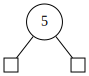

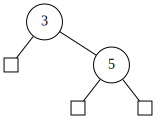

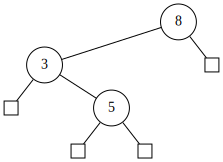

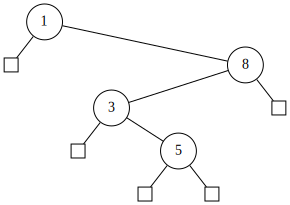

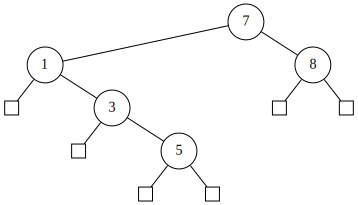

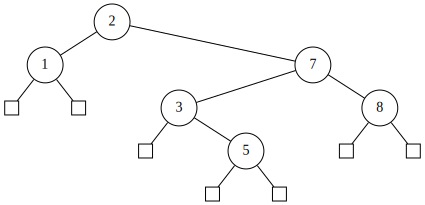

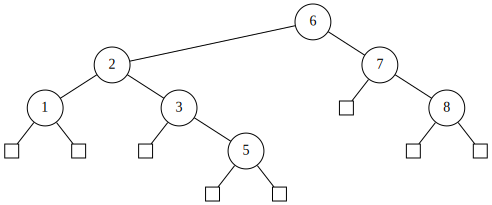

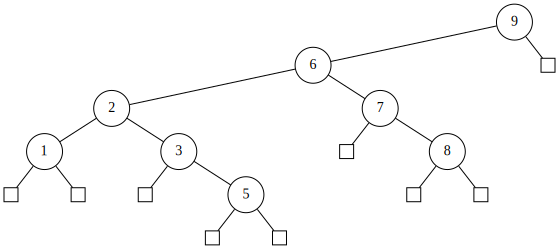

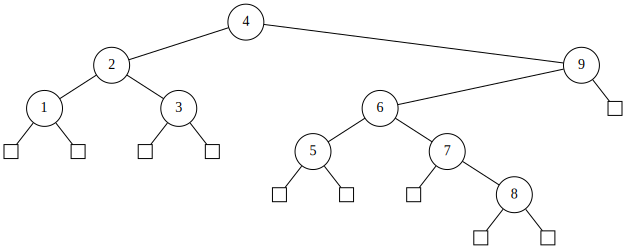

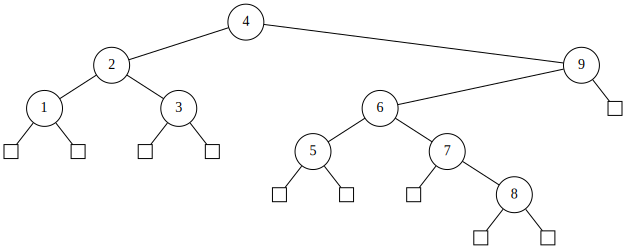

In [ ]:
lista=[4,9,6,2,7,1,8,3,5]
a=Arbol()
for x in reversed(lista):
    a.root_insert(x)
    a.dibujar()
c=Arbol()
for x in lista:
    c.insert(x)
c.dibujar()

Si todo está bien, el resultado final de insertar la lista reversa usando ``root_insert``debería ser igual al obtenido insertando la lista original usando ``insert``.

caso base cut:


caso base root_insert:


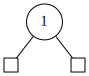

In [ ]:
#Prueba caso base
print("caso base cut:")
b=Arbol()
b.dibujar()
c=b.cut(1)
c[0].dibujar()
c[1].dibujar()
print("caso base root_insert:")
b.root_insert(1)
b.dibujar()

Pruebas varias:

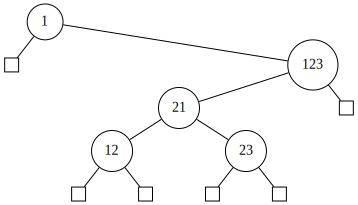

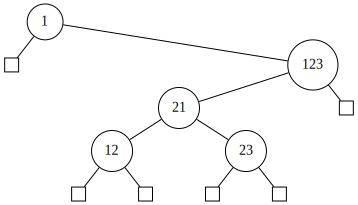

In [ ]:
lista=[1,123,21,23,12]
a=Arbol()
b=Arbol()
for x in reversed(lista):
    a.root_insert(x)
a.dibujar()
for x in lista:
    b.insert(x)
b.dibujar()


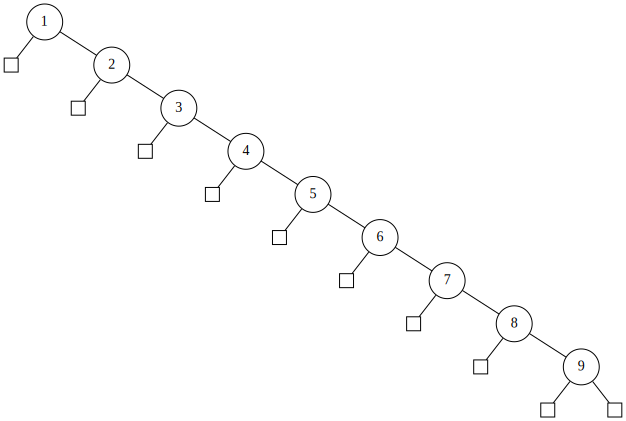

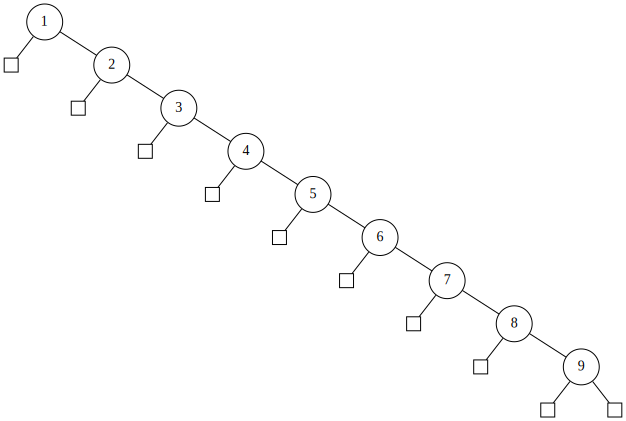

In [ ]:
lista=[1,2,3,4,5,6,7,8,9]
a=Arbol()
b=Arbol()
for x in reversed(lista):
    a.root_insert(x)
a.dibujar()
for x in lista:
    b.insert(x)
b.dibujar()

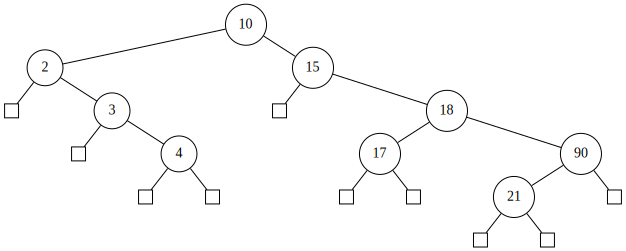

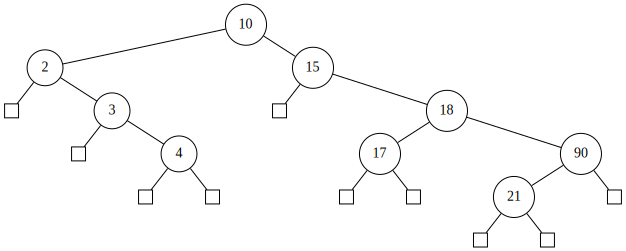

In [ ]:
lista=[10,2,15,3,18,4,90,17,21]
a=Arbol()
b=Arbol()
for x in reversed(lista):
    a.root_insert(x)
a.dibujar()
for x in lista:
    b.insert(x)
b.dibujar()

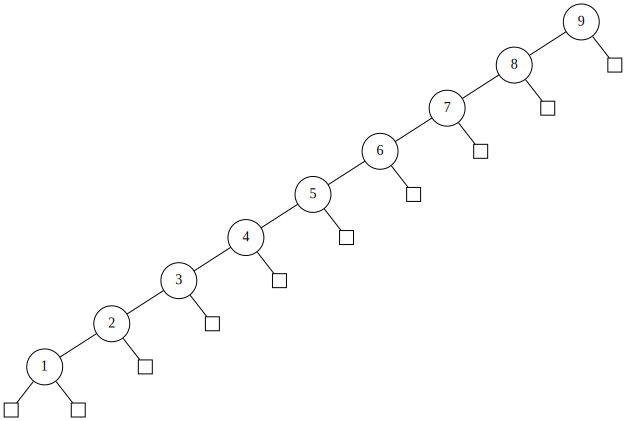

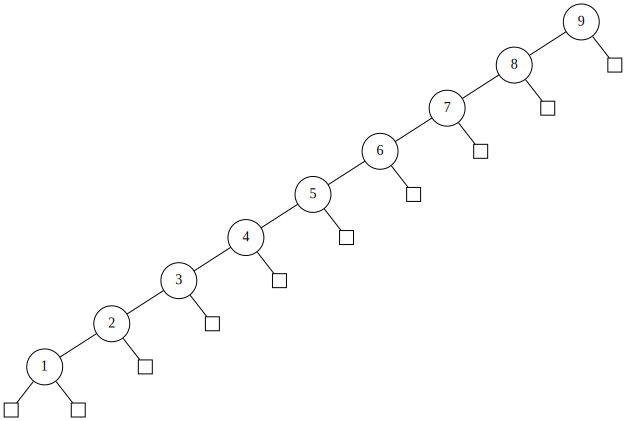

In [ ]:
lista=[9,8,7,6,5,4,3,2,1]
a=Arbol()
b=Arbol()
for x in reversed(lista):
    a.root_insert(x)
a.dibujar()
for x in lista:
    b.insert(x)
b.dibujar()

## ¿Qué hay que entregar?

Usted debe entregar este mismo archivo, modificado de acuerdo a lo que se pide. Haga todos los cambios necesarios para explicar y documentar adecuadamente su código. No olvide poner su nombre.